In [84]:
import os # accessing directory structure
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
%matplotlib inline
# import libraries
from nltk.tokenize import word_tokenize , sent_tokenize
from sklearn.pipeline import Pipeline , FeatureUnion
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier ,BaggingClassifier ,ExtraTreesClassifier
from sklearn.model_selection import train_test_split,  GridSearchCV 
from sklearn.metrics import classification_report ,confusion_matrix , accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ahmad Abd
[nltk_data]     Elhameed\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv('tweet_emotions.csv', delimiter=',')
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [4]:
df.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [7]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    plt.figure(figsize=(16,12))
    sns.countplot(
        data=data,
        x=label
    )

## Data Understanding
describe_data function will help us understand each dataset

Data  DESCRIPTION
--------------------------
Data  shape: (40000, 3) 

Data  contains: 0  null values

Label counts:
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

***** Data  label count plot ****


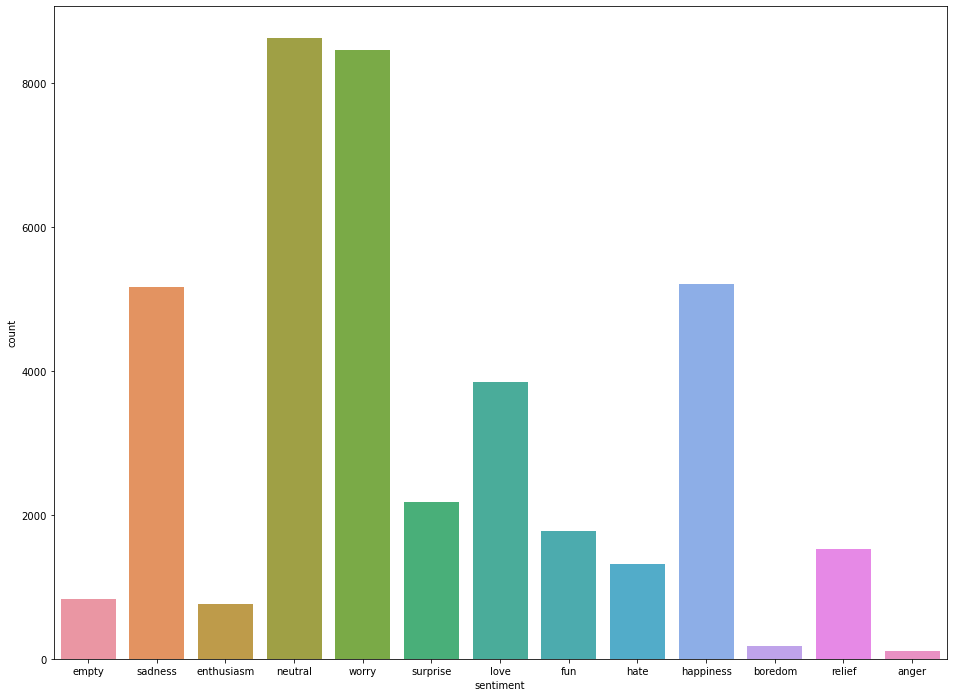

In [8]:
describe_data("Data",df,"sentiment")

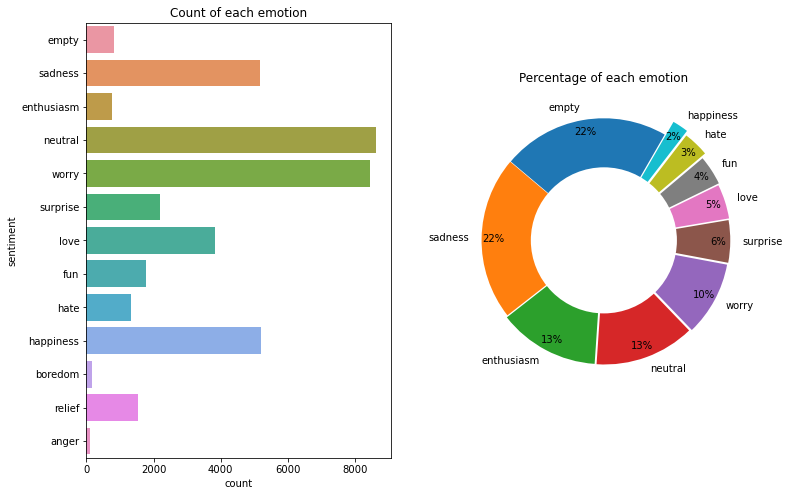

In [9]:
col = 'sentiment'
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,8))
explode = list((np.array(list(df[col].dropna().value_counts()))/sum(list(df[col].dropna().value_counts())))[::-1])[:10]
labels = list(df[col].dropna().unique())[:10]
sizes = df[col].value_counts()[:10]
ax2.pie(sizes,  explode=explode, startangle=60, labels=labels,autopct='%1.0f%%', pctdistance=0.9)
ax2.add_artist(plt.Circle((0,0),0.6,fc='white'))
sns.countplot(y =col, data = df, ax=ax1)
ax1.set_title("Count of each emotion")
ax2.set_title("Percentage of each emotion")
plt.show()

## We can see that there are 13 different classes and some of the are having very few examples. (i.e. Anger, Boredom, Empty etc...). This is a very imbalanced dataset and it will not allow the model to converge. We'll reduce the number of classes.

In [ ]:
## I Will Keep the most five motion 

In [12]:
df['sentiment'] = df['sentiment'].apply(lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other") 

In [13]:
df.head()

,tweet_id,sentiment,content
0,1956967341,other,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,other,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [14]:
df1 = df[(df.sentiment.isin(["sadness", "neutral","worry","love","happiness"]))]

In [15]:
df1.head()

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."


In [16]:
df1.shape

(31313, 3)

In [18]:
df1.sentiment.unique()

array(['sadness', 'neutral', 'worry', 'love', 'happiness'], dtype=object)

## Ok I kept the top five emotions

Data  DESCRIPTION
--------------------------
Data  shape: (31313, 3) 

Data  contains: 0  null values

Label counts:
neutral      8638
worry        8459
happiness    5209
sadness      5165
love         3842
Name: sentiment, dtype: int64

***** Data  label count plot ****


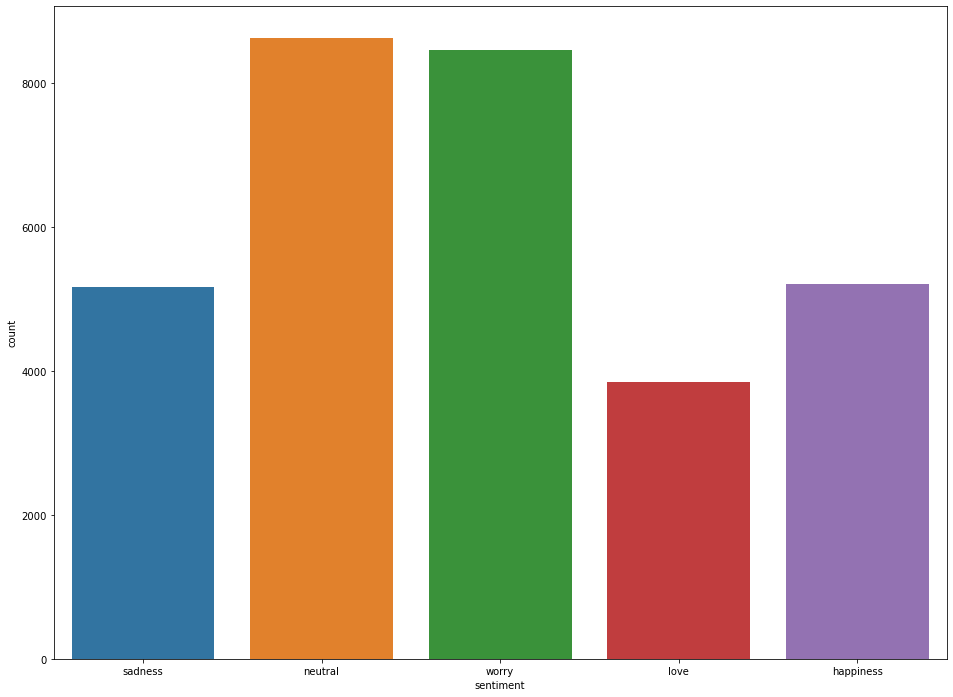

In [19]:
describe_data("Data",df1,"sentiment")

In [22]:
def label_encode(data,label):
    labels=data[label].map(
    {
        "sadness":0,
        "neutral":1,
        "worry":2,
        "love":3,
        "happiness":4
    }
    )
    return labels

In [23]:
df1["label"]=label_encode(df1,"sentiment")

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df1.head()

,tweet_id,sentiment,content,label
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0
2,1956967696,sadness,Funeral ceremony...gloomy friday...,0
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,1
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,2
6,1956968487,sadness,"I should be sleep, but im not! thinking about ...",0


In [56]:
df1= df1.reset_index()

In [57]:
df1.drop(['index'],axis=1,inplace=True)

In [64]:
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = onehotencoder.fit_transform(df1.label.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
one_hot = pd.DataFrame(X, columns = [str(int(i)) for i in range(df1["label"].nunique())]) 
df2 = pd.concat([df1, one_hot], axis=1)
#printing to verify 
print(df2.head())

     tweet_id sentiment                                            content  \
0  1956967666   sadness  Layin n bed with a headache  ughhhh...waitin o...   
1  1956967696   sadness                Funeral ceremony...gloomy friday...   
2  1956968416   neutral  @dannycastillo We want to trade with someone w...   
3  1956968477     worry  Re-pinging @ghostridah14: why didn't you go to...   
4  1956968487   sadness  I should be sleep, but im not! thinking about ...   

   label    0    1    2    3    4  
0      0  1.0  0.0  0.0  0.0  0.0  
1      0  1.0  0.0  0.0  0.0  0.0  
2      1  0.0  1.0  0.0  0.0  0.0  
3      2  0.0  0.0  1.0  0.0  0.0  
4      0  1.0  0.0  0.0  0.0  0.0  


In [65]:
df2.shape

(31313, 9)

In [66]:
df2.rename(columns={'0': 'sadness', '1': 'neutral',"2":"worry","3":"love",'4':"happiness"}, inplace=True)

In [67]:
df2.head()

,tweet_id,sentiment,content,label,sadness,neutral,worry,love,happiness
0,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,0,1.0,0.0,0.0,0.0,0.0
1,1956967696,sadness,Funeral ceremony...gloomy friday...,0,1.0,0.0,0.0,0.0,0.0
2,1956968416,neutral,@dannycastillo We want to trade with someone w...,1,0.0,1.0,0.0,0.0,0.0
3,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...,2,0.0,0.0,1.0,0.0,0.0
4,1956968487,sadness,"I should be sleep, but im not! thinking about ...",0,1.0,0.0,0.0,0.0,0.0


In [68]:
y = df2[['sadness','neutral',"worry","love","happiness"]].astype(int)

In [69]:
y.head()

,sadness,neutral,worry,love,happiness
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [72]:
X = df2.content

In [73]:
X

0        Layin n bed with a headache  ughhhh...waitin o...
1                      Funeral ceremony...gloomy friday...
2        @dannycastillo We want to trade with someone w...
3        Re-pinging @ghostridah14: why didn't you go to...
4        I should be sleep, but im not! thinking about ...
                               ...                        
31308                                     @JohnLloydTaylor
31309                       Happy Mothers Day  All my love
31310    Happy Mother's Day to all the mommies out ther...
31311    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
31312    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 31313, dtype: object

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Tokenization function to process your text data

In [74]:
lemmatizer = WordNetLemmatizer()
def tokenize(text):
    lower_text = text.lower()
    normalized_text = re.sub(r"[^a-zA-Z0-9]"," ",lower_text)
    text_token = word_tokenize(normalized_text)
    remove_stop_words = [word for word in text_token if word not in stopwords.words('english')]
    lemmatized = [lemmatizer.lemmatize(word) for word in remove_stop_words]
    return lemmatized

## Function to display results

In [77]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

## Accuracy report

In [82]:
total_scores = []
def accuracy_report(y_test,y_pred):
    i = 0
    for feat in y_test:
        print("Feature {}: {}".format(i+1,feat))
        print(classification_report(y_test[feat],y_pred[:,i]))
        accuracy = accuracy_score(y_test.iloc[:,i],y_pred[:,i])
        total_scores.append(accuracy)
        i+=1
    print("Total Accuracy : {:.4f}".format(np.mean(total_scores)))

## A machine learning pipeline
This machine pipeline should take in the comment column as input and output classification results on the other 5 categories in the dataset.

## Random Forest

In [78]:
pipeline_rf = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(RandomForestClassifier()))])
pipeline_rf.fit(X_train,y_train)


NameError: name 'pipeline' is not defined

In [83]:
# predict on test data
y_pred = pipeline_rf.predict(X_test)
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5156
           1       0.46      0.08      0.13      1107

    accuracy                           0.82      6263
   macro avg       0.65      0.53      0.52      6263
weighted avg       0.77      0.82      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      4580
           1       0.56      0.22      0.32      1683

    accuracy                           0.74      6263
   macro avg       0.66      0.58      0.58      6263
weighted avg       0.71      0.74      0.70      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4633
           1       0.44      0.13      0.20      1630

    accuracy                           0.73      6263
   macro avg       0.60      0.54      0.52      6263
weighted avg       

## AdaBoost

In [85]:
pipeline_adaboost = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(AdaBoostClassifier()))])
pipeline_adaboost.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_adaboost.predict(X_test)
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      5156
           1       0.56      0.10      0.17      1107

    accuracy                           0.83      6263
   macro avg       0.70      0.54      0.53      6263
weighted avg       0.79      0.83      0.77      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.74      0.98      0.84      4580
           1       0.50      0.06      0.10      1683

    accuracy                           0.73      6263
   macro avg       0.62      0.52      0.47      6263
weighted avg       0.67      0.73      0.64      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      4633
           1       0.52      0.14      0.22      1630

    accuracy                           0.74      6263
   macro avg       0.64      0.55      0.53      6263
weighted avg       

## GradientBoosting

In [86]:
pipeline_boosting = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(GradientBoostingClassifier()))])
pipeline_boosting.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_boosting.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5156
           1       0.61      0.05      0.09      1107

    accuracy                           0.83      6263
   macro avg       0.72      0.52      0.50      6263
weighted avg       0.79      0.83      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      4580
           1       0.73      0.00      0.01      1683

    accuracy                           0.73      6263
   macro avg       0.73      0.50      0.43      6263
weighted avg       0.73      0.73      0.62      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.75      0.99      0.85      4633
           1       0.64      0.04      0.08      1630

    accuracy                           0.74      6263
   macro avg       0.69      0.52      0.47      6263
weighted avg       

## Bagging

In [87]:
pipeline_bagging = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(BaggingClassifier()))])
pipeline_bagging.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_bagging.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5156
           1       0.42      0.15      0.22      1107

    accuracy                           0.81      6263
   macro avg       0.63      0.55      0.56      6263
weighted avg       0.77      0.81      0.78      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      4580
           1       0.49      0.30      0.37      1683

    accuracy                           0.73      6263
   macro avg       0.63      0.59      0.60      6263
weighted avg       0.70      0.73      0.71      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      4633
           1       0.40      0.22      0.28      1630

    accuracy                           0.71      6263
   macro avg       0.58      0.55      0.55      6263
weighted avg       

## ExtraTrees

In [88]:
pipeline_extratrees = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ('clf', MultiOutputClassifier(ExtraTreesClassifier()))])
pipeline_extratrees.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_extratrees.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5156
           1       0.42      0.06      0.11      1107

    accuracy                           0.82      6263
   macro avg       0.63      0.52      0.51      6263
weighted avg       0.76      0.82      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      4580
           1       0.54      0.22      0.32      1683

    accuracy                           0.74      6263
   macro avg       0.65      0.58      0.58      6263
weighted avg       0.71      0.74      0.70      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      4633
           1       0.45      0.13      0.21      1630

    accuracy                           0.73      6263
   macro avg       0.60      0.54      0.52      6263
weighted avg       

## Decision Tree

In [89]:
pipeline_DT = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(DecisionTreeClassifier()))])
pipeline_DT.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_DT.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5156
           1       0.32      0.24      0.28      1107

    accuracy                           0.78      6263
   macro avg       0.59      0.57      0.57      6263
weighted avg       0.75      0.78      0.76      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      4580
           1       0.39      0.33      0.36      1683

    accuracy                           0.68      6263
   macro avg       0.58      0.57      0.57      6263
weighted avg       0.67      0.68      0.67      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4633
           1       0.36      0.33      0.34      1630

    accuracy                           0.67      6263
   macro avg       0.56      0.56      0.56      6263
weighted avg       

## Naive Bayes

In [90]:
pipeline_NV = Pipeline([("vect",CountVectorizer(tokenizer=tokenize)),
          ("tfidf",TfidfTransformer()),
          ("clf",MultiOutputClassifier(MultinomialNB()))])
pipeline_NV.fit(X_train,y_train)
# predict on test data
y_pred = pipeline_NV.predict(X_test)
## display accuracy
accuracy_report(y_test,y_pred)

Feature 1: sadness
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5156
           1       0.00      0.00      0.00      1107

    accuracy                           0.82      6263
   macro avg       0.41      0.50      0.45      6263
weighted avg       0.68      0.82      0.74      6263

Feature 2: neutral
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      4580
           1       0.62      0.00      0.01      1683

    accuracy                           0.73      6263
   macro avg       0.67      0.50      0.43      6263
weighted avg       0.70      0.73      0.62      6263

Feature 3: worry
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      4633
           1       0.58      0.01      0.03      1630

    accuracy                           0.74      6263
   macro avg       0.66      0.51      0.44      6263
weighted avg       

C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmad Abd Elhameed\Anaconda3\envs\nlp\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le